In [1]:
import numpy as np
import pandas as pd

from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from load_datasets import load_diabetes, load_breast_cancer, load_svmguide1, load_australian, load_mushrooms, load_german
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic_epochs, diagnostic_time, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_13664\2802561659.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [42]:
ktuning = 300

# Diabetes

In [2]:
data_diab = load_diabetes()

X_train = (614, 9), y_train = (614,)
X_test = (154, 9), y_test = (154,)
Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}
sklearn train score: 0.762215
sklearn test score: 0.753247
sklearn sol norm: 4.208219516497245


In [3]:
CDiab = 1
MDiab = 8
kDiab = 200
print(f"Iterations: {data_diab[1].size / MDiab}")

Iterations: 76.75


## Benchmark

In [4]:
benchDiab = run_bench(data_diab, CDiab)

benchDiab_data = optim_bench(benchDiab)

## SGD

In [5]:
# BatchGD-Fixed
batchfixed_diab = run_solvers("SGD-Fixed", CDiab, data_diab, kDiab, data_diab[1].size, (1, 0.1, 0.01))

In [16]:
# SGD-Fixed
sgdfixed_diab = run_solvers("SGD-Fixed", CDiab, data_diab, kDiab, MDiab, (0.5, 0.1, 0.01))

In [12]:
# SGD-Decreasing
sgddecre_diab = run_solvers("SGD-Decreasing", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01))

In [20]:
# SGDM
sgdm_diab = run_solvers("SGDM", CDiab, data_diab, kDiab, MDiab, (0.5, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [8]:
# SGD-Armijo
sgdarmijo_diab = run_solvers("SGD-Armijo", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01))

In [9]:
# MSL-SGDM-C
mslc_diab = run_solvers("MSL-SGDM-C", CDiab, data_diab, kDiab, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# MSL-SGDM-R
mslr_diab = run_solvers("MSL-SGDM-R", CDiab, data_diab, kDiab, MDiab, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [21]:
modelsDiab_data = optim_data(batchfixed_diab + sgdfixed_diab + sgddecre_diab + sgdm_diab + sgdarmijo_diab + mslc_diab + mslr_diab)

## Summary

In [22]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,1.328870e-06,NaN,5,0.653094,0.642857,0.193861
3,SGD-Fixed,1,614.0,1.00,0.0,0.662128,1.897459e-16,0.018190,200,0.653094,0.642857,0.193861
4,SGD-Fixed,1,614.0,0.10,0.0,0.662128,9.497691e-10,0.020761,200,0.653094,0.642857,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,2.752638e-06,NaN,6,0.653094,0.642857,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,1.367774e-05,NaN,6,0.653094,0.642857,0.193861
10,SGD-Decreasing,1,8.0,0.10,0.0,0.662128,1.419826e-04,0.198714,200,0.653094,0.642857,0.193965
16,SGD-Armijo,1,8.0,0.10,0.0,0.662128,1.775693e-04,1.277504,200,0.653094,0.642857,0.193880
17,SGD-Armijo,1,8.0,0.01,0.0,0.662128,4.610571e-04,1.260067,200,0.653094,0.642857,0.193871
21,MSL-SGDM-R,1,8.0,1.00,0.9,0.662129,1.299907e-03,1.292967,200,0.653094,0.642857,0.193450
15,SGD-Armijo,1,8.0,1.00,0.0,0.662129,1.379340e-03,1.292137,200,0.653094,0.642857,0.193861


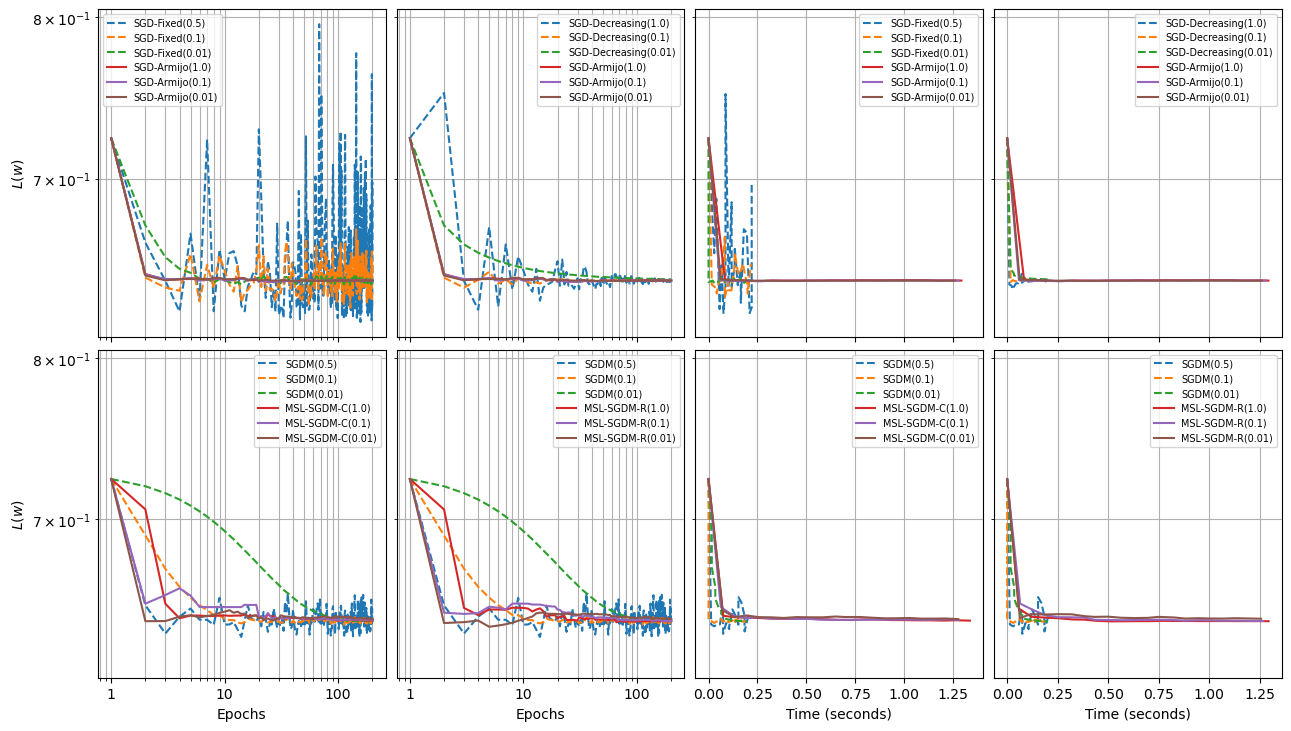

In [23]:
diagnostic(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-diagnostic.pdf")

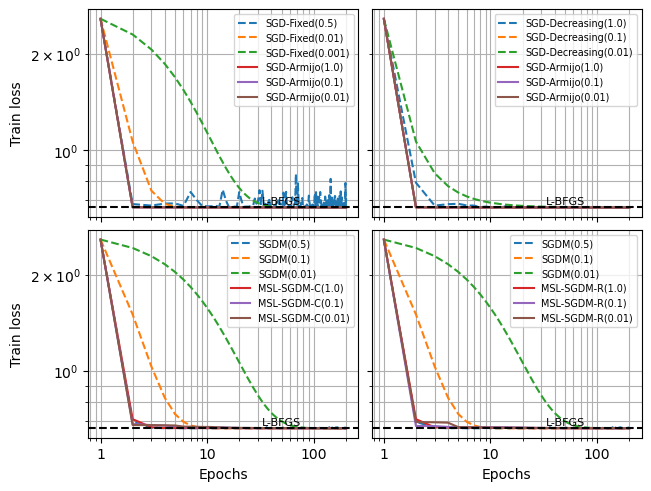

In [16]:
diagnostic_epochs(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-epochs.pdf")

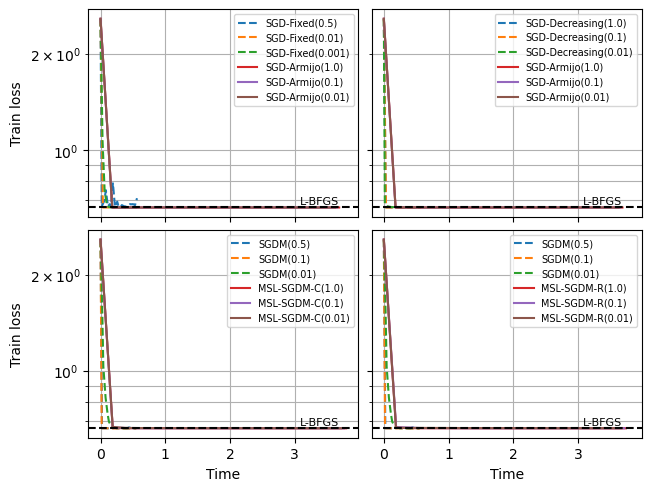

In [17]:
diagnostic_time(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-time.pdf")

## Fine-tuning

In [24]:
batchfixed_diab1 = LogisticRegression("SGD-Fixed", CDiab).fit(data_diab, kDiab, data_diab[1].size, 0.75, stop=1)

In [25]:
sgdfixed_diab1 = LogisticRegression("SGD-Fixed", CDiab).fit(data_diab, kDiab, MDiab, 0.005, stop=1)

In [26]:
sgddecre_diab1 = LogisticRegression("SGD-Decreasing", CDiab).fit(data_diab, kDiab, MDiab, 1, stop=1)

In [27]:
sgdm_diab1 = LogisticRegression("SGDM", CDiab).fit(data_diab, kDiab, MDiab, 0.05, 0.9, stop=1)

In [28]:
sgdarmijo_diab1 = LogisticRegression("SGD-Armijo", CDiab).fit(data_diab, kDiab, MDiab, 0.5, stop=1)

In [29]:
mslc_diab1 = LogisticRegression("MSL-SGDM-C", CDiab).fit(data_diab, kDiab, MDiab, 0.5, 0.9, stop=1)

In [30]:
mslr_diab1 = LogisticRegression("MSL-SGDM-R", CDiab).fit(data_diab, kDiab, MDiab, 0.8, 0.9, stop=1)

In [31]:
fine_diab_data = optim_data([batchfixed_diab1, sgdfixed_diab1, sgddecre_diab1, sgdm_diab1, sgdarmijo_diab1, mslc_diab1, mslr_diab1])

test_diab = models_summary(fine_diab_data, benchDiab_data)
test_diab.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.193861
3,SGD-Fixed,1,614.0,0.750,0.0,0.662128,0.000489,0.002108,6,0.653094,0.642857,0.193988
4,SGD-Fixed,1,8.0,0.005,0.0,0.662128,0.000873,0.034093,25,0.653094,0.642857,0.193979
5,SGD-Decreasing,1,8.0,1.000,0.0,0.662128,0.000953,0.161263,155,0.653094,0.642857,0.193410
7,SGD-Armijo,1,8.0,0.500,0.0,0.662128,0.000960,1.115090,173,0.653094,0.642857,0.194015
6,SGDM,1,8.0,0.050,0.9,0.662129,0.000927,0.090268,82,0.653094,0.642857,0.193783
9,MSL-SGDM-R,1,8.0,0.800,0.9,0.662129,0.001085,1.304485,200,0.653094,0.642857,0.193623
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.662142,0.005357,1.328425,200,0.653094,0.642857,0.191948


In [31]:
print(test_diab[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS & NaN & 6 & NaN & 0.662128 & 0.000014 & 0.642857 \\
Newton-CG & NaN & 5 & NaN & 0.662128 & 0.000001 & 0.642857 \\
CG & NaN & 6 & NaN & 0.662128 & 0.000003 & 0.642857 \\
SGD-Fixed & 0.750000 & 6 & 0.002129 & 0.662128 & 0.000489 & 0.642857 \\
SGD-Fixed & 0.005000 & 25 & 0.027607 & 0.662128 & 0.000873 & 0.642857 \\
SGD-Decreasing & 1.000000 & 155 & 0.158777 & 0.662128 & 0.000953 & 0.642857 \\
SGDM & 0.050000 & 82 & 0.086553 & 0.662129 & 0.000927 & 0.642857 \\
SGD-Armijo & 0.500000 & 173 & 1.102717 & 0.662128 & 0.000960 & 0.642857 \\
MSL-SGDM-C & 0.500000 & 200 & 1.299045 & 0.662142 & 0.005357 & 0.642857 \\
MSL-SGDM-R & 0.800000 & 200 & 1.290177 & 0.662129 & 0.001085 & 0.642857 \\
\bottomrule
\end{tabular}



# Breast cancer

In [3]:
data_breast = load_breast_cancer()

X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}
sklearn train score: 0.972527
sklearn test score: 0.948905
sklearn sol norm: 3.306057435044822


In [3]:
CBreast = 1
MBreast = 8
kBreast = 200
print(f"Iterations: {data_breast[1].size / MBreast}")

Iterations: 68.25


## Benchmark

In [4]:
benchBreast = run_bench(data_breast, CBreast)

benchBreast_data = optim_bench(benchBreast)

## SGD

In [6]:
# BatchGD-Fixed
batchfixed_breast = run_solvers("SGD-Fixed", CBreast, data_breast, kBreast, data_breast[1].size, (1, 0.1, 0.01))

In [16]:
# SGD-Fixed
sgdfixed_breast = run_solvers("SGD-Fixed", CBreast, data_breast, kBreast, MBreast, (0.5, 0.1, 0.01))

In [7]:
# SGD-Decreasing
sgddecre_breast = run_solvers("SGD-Decreasing", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01))

In [15]:
# SGDM
sgdm_breast = run_solvers("SGDM", CBreast, data_breast, kBreast, MBreast, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [9]:
# SGD-Armijo
sgdarmijo_breast = run_solvers("SGD-Armijo", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01))

In [10]:
# MSL-SGDM-C
mslc_breast = run_solvers("MSL-SGDM-C", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [11]:
# MSL-SGDM-R
mslr_breast = run_solvers("MSL-SGDM-R", CBreast, data_breast, kBreast, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [17]:
modelsBreast_data = optim_data(batchfixed_breast + sgdfixed_breast + sgddecre_breast + sgdm_breast + sgdarmijo_breast + mslc_breast + mslr_breast)

## Summary

In [18]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="l2-Loss")

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,546.0,0.10,0.0,0.492561,8.064461e-10,0.020876,200,0.902930,0.817518,0.447463
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.447463
10,SGD-Decreasing,1,8.0,0.10,0.0,0.492561,1.923749e-04,0.193266,200,0.902930,0.817518,0.447564
17,SGD-Armijo,1,8.0,0.01,0.0,0.492561,1.253336e-03,1.104029,200,0.902930,0.817518,0.447510
15,SGD-Armijo,1,8.0,1.00,0.0,0.492562,1.504207e-03,1.125105,200,0.902930,0.817518,0.447707
14,SGDM,1,8.0,0.01,0.9,0.492562,1.906914e-03,0.179775,200,0.902930,0.817518,0.447558
16,SGD-Armijo,1,8.0,0.10,0.0,0.492563,2.069448e-03,1.107643,200,0.902930,0.817518,0.447529
21,MSL-SGDM-R,1,8.0,1.00,0.9,0.492565,3.153037e-03,1.152815,200,0.902930,0.817518,0.447275


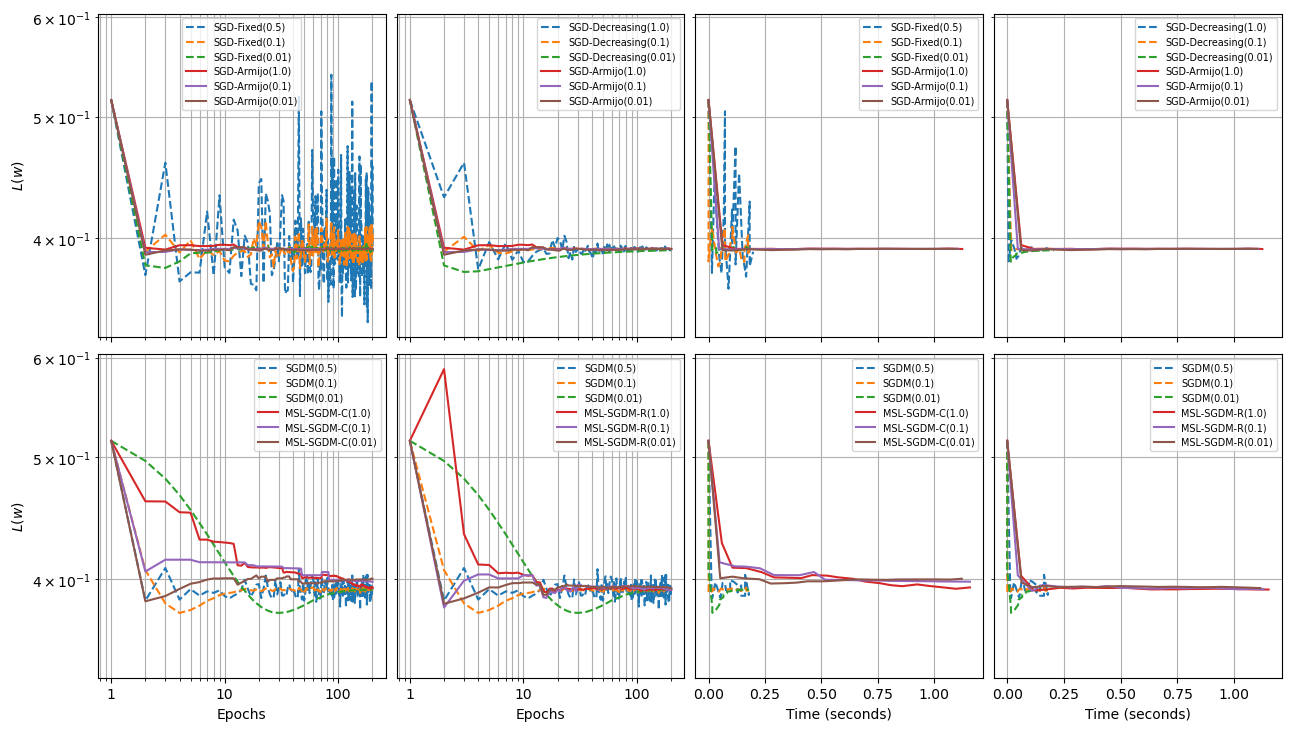

In [19]:
diagnostic(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-diagnostic.pdf")

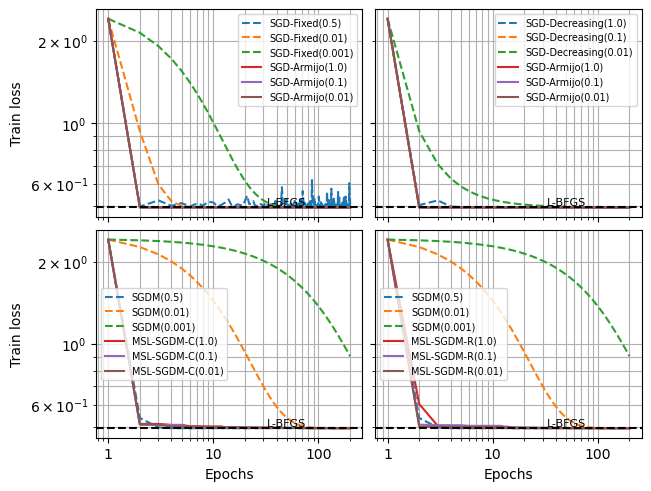

In [39]:
diagnostic_epochs(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-epochs.pdf")

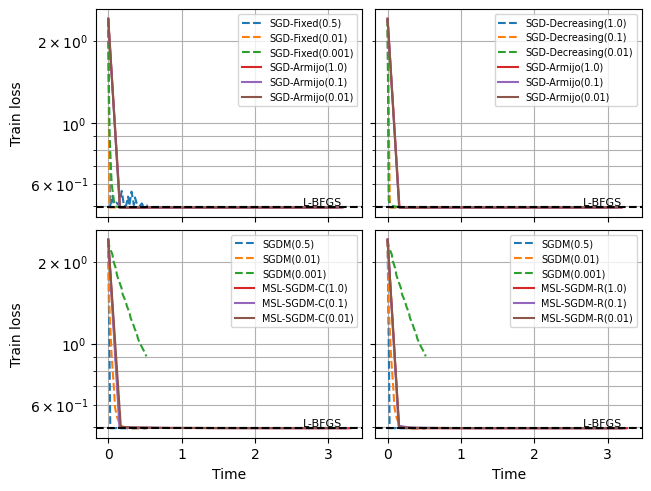

In [40]:
diagnostic_time(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-time.pdf")

## Fine-tuning

In [20]:
batchfixed_breast1 = LogisticRegression("SGD-Fixed", CBreast).fit(data_breast, kBreast, data_breast[1].size, 0.75, stop=1)

In [21]:
sgdfixed_breast1 = LogisticRegression("SGD-Fixed", CBreast).fit(data_breast, kBreast, MBreast, 0.005, stop=1)

In [22]:
sgddecre_breast1 = LogisticRegression("SGD-Decreasing", CBreast).fit(data_breast, kBreast, MBreast, 1, stop=1)

In [56]:
sgdm_breast1 = LogisticRegression("SGDM", CBreast).fit(data_breast, kBreast, MBreast, 0.04, 0.9, stop=1)

In [24]:
sgdarmijo_breast1 = LogisticRegression("SGD-Armijo", CBreast).fit(data_breast, kBreast, MBreast, 1, stop=1)

In [65]:
mslc_breast1 = LogisticRegression("MSL-SGDM-C", CBreast).fit(data_breast, kBreast, MBreast, 0.5, 0.9, stop=1)

In [26]:
mslr_breast1 = LogisticRegression("MSL-SGDM-R", CBreast).fit(data_breast, kBreast, MBreast, 0.5, 0.9, stop=1)

In [66]:
fine_breast_data = optim_data([batchfixed_breast1, sgdfixed_breast1, sgddecre_breast1, sgdm_breast1, sgdarmijo_breast1, mslc_breast1, mslr_breast1])

test_breast = models_summary(fine_breast_data, benchBreast_data)
test_breast.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.447463
3,SGD-Fixed,1,546.0,0.750,0.0,0.492561,7.985904e-04,0.003855,12,0.902930,0.817518,0.447153
5,SGD-Decreasing,1,8.0,1.000,0.0,0.492561,6.663238e-04,0.151237,156,0.902930,0.817518,0.447604
6,SGDM,1,8.0,0.040,0.9,0.492561,7.878449e-04,0.080025,76,0.902930,0.817518,0.447313
4,SGD-Fixed,1,8.0,0.005,0.0,0.492561,9.515956e-04,0.047444,35,0.902930,0.817518,0.447592
7,SGD-Armijo,1,8.0,1.000,0.0,0.492561,9.997011e-04,0.559201,101,0.902930,0.817518,0.447142
9,MSL-SGDM-R,1,8.0,0.500,0.9,0.492572,4.901774e-03,1.141830,200,0.902930,0.817518,0.447008
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.492730,1.915761e-02,1.165983,200,0.901099,0.817518,0.442534


In [67]:
print(test_breast[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS & NaN & 7 & NaN & 0.492561 & 0.000003 & 0.817518 \\
Newton-CG & NaN & 7 & NaN & 0.492561 & 0.000001 & 0.817518 \\
CG & NaN & 8 & NaN & 0.492561 & 0.000002 & 0.817518 \\
SGD-Fixed & 0.750000 & 12 & 0.003855 & 0.492561 & 0.000799 & 0.817518 \\
SGD-Fixed & 0.005000 & 35 & 0.047444 & 0.492561 & 0.000952 & 0.817518 \\
SGD-Decreasing & 1.000000 & 156 & 0.151237 & 0.492561 & 0.000666 & 0.817518 \\
SGDM & 0.040000 & 76 & 0.080025 & 0.492561 & 0.000788 & 0.817518 \\
SGD-Armijo & 1.000000 & 101 & 0.559201 & 0.492561 & 0.001000 & 0.817518 \\
MSL-SGDM-C & 0.500000 & 200 & 1.165983 & 0.492730 & 0.019158 & 0.817518 \\
MSL-SGDM-R & 0.500000 & 200 & 1.141830 & 0.492572 & 0.004902 & 0.817518 \\
\bottomrule
\end{tabular}



# svmguide1

In [4]:
data_svm = load_svmguide1()

X_train = (3089, 5), y_train = (3089,)
X_test = (4000, 5), y_test = (4000,)
Class distribution: {-1: 0.3525412754936873, 1: 0.6474587245063127}
sklearn train score: 0.950469
sklearn test score: 0.952500
sklearn sol norm: 15.414960916644974


In [4]:
Csvm = 1
Msvm = 32
ksvm = 200
print(f"Iterations: {data_svm[1].size / Msvm}")

Iterations: 96.53125


## Benchmark

In [5]:
benchSvm = run_bench(data_svm, Csvm)

benchSvm_data = optim_bench(benchSvm)

## SGD

In [6]:
# BatchGD-Fixed
batchfixed_svm = run_solvers("SGD-Fixed", Csvm, data_svm, ksvm, data_svm[1].size, (0.5, 0.1, 0.01))

In [7]:
# SGD-Fixed
sgdfixed_svm = run_solvers("SGD-Fixed", Csvm, data_svm, ksvm, Msvm, (0.5, 0.1, 0.01))

In [8]:
# SGD-Decreasing
sgddecre_svm = run_solvers("SGD-Decreasing", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01))

In [9]:
# SGDM
sgdm_svm = run_solvers("SGDM", Csvm, data_svm, ksvm, Msvm, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [10]:
# SGD-Armijo
sgdarmijo_svm = run_solvers("SGD-Armijo", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01))

In [11]:
# MSL-SGDM-C
mslc_svm = run_solvers("MSL-SGDM-C", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [12]:
# MSL-SGDM-R
mslr_svm = run_solvers("MSL-SGDM-R", Csvm, data_svm, ksvm, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [13]:
modelsSvm_data = optim_data(batchfixed_svm + sgdfixed_svm + sgddecre_svm + sgdarmijo_svm + sgdm_svm + mslc_svm + mslr_svm)

## Summary

In [14]:
models_summary(modelsSvm_data, benchSvm_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,3089.0,0.10,0.0,0.673302,6.616181e-10,0.093740,200,0.653933,0.51675,0.181772
3,SGD-Fixed,1,3089.0,0.50,0.0,0.673302,5.898060e-17,0.106739,200,0.653933,0.51675,0.181772
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181772
10,SGD-Decreasing,1,32.0,0.10,0.0,0.673302,2.869591e-05,0.504873,200,0.653933,0.51675,0.181772
14,SGD-Armijo,1,32.0,0.01,0.0,0.673302,6.004681e-05,7.417102,200,0.653933,0.51675,0.181846
13,SGD-Armijo,1,32.0,0.10,0.0,0.673302,1.531927e-04,7.407556,200,0.653933,0.51675,0.181808
16,SGDM,1,32.0,0.10,0.9,0.673302,4.444346e-04,0.345527,200,0.653610,0.51600,0.182064
12,SGD-Armijo,1,32.0,1.00,0.0,0.673303,6.643345e-04,7.419989,200,0.653933,0.51700,0.182044


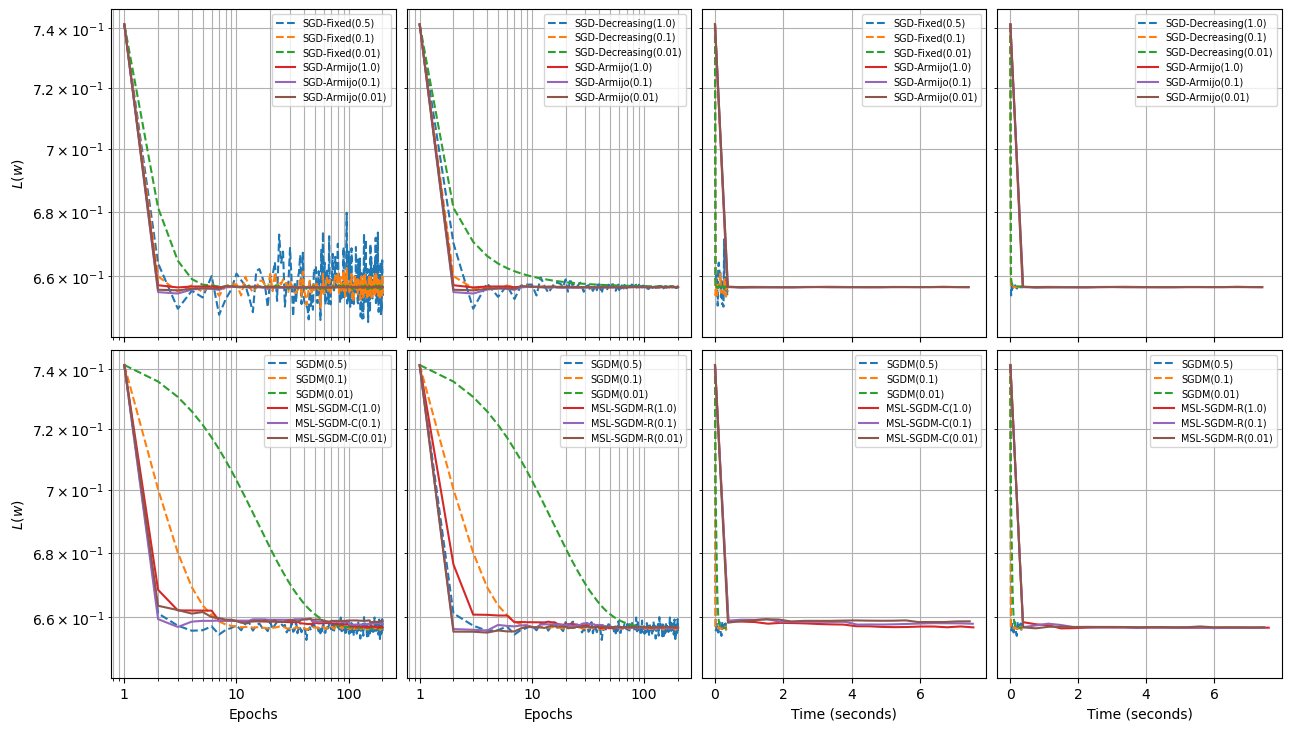

In [15]:
diagnostic(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-diagnostic.pdf")

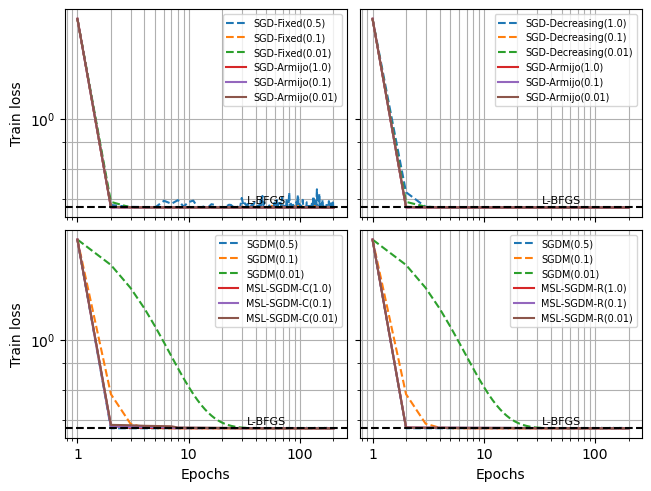

In [52]:
diagnostic_epochs(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-epochs.pdf")

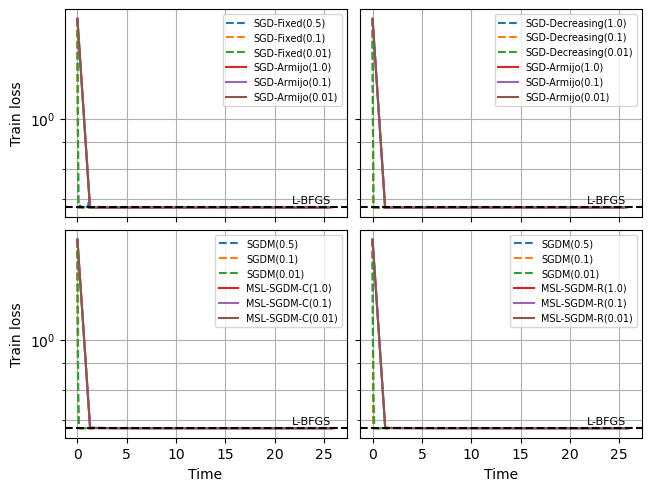

In [53]:
diagnostic_time(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-time.pdf")

## Fine-tuning

In [32]:
batchfixed_svm1 = LogisticRegression("SGD-Fixed", Csvm).fit(data_svm, ksvm, data_svm[1].size, 0.75, stop=1)

In [17]:
sgdfixed_svm1 = LogisticRegression("SGD-Fixed", Csvm).fit(data_svm, ksvm, Msvm, 0.01, stop=1)

In [18]:
sgddecre_svm1 = LogisticRegression("SGD-Decreasing", Csvm).fit(data_svm, ksvm, Msvm, 1, stop=1)

In [19]:
sgdm_svm1 = LogisticRegression("SGDM", Csvm).fit(data_svm, ksvm, Msvm, 0.05, 0.9, stop=1)

In [20]:
sgdarmijo_svm1 = LogisticRegression("SGD-Armijo", Csvm).fit(data_svm, ksvm, Msvm, 0.5, stop=1)

In [21]:
mslc_svm1 = LogisticRegression("MSL-SGDM-C", Csvm).fit(data_svm, ksvm, Msvm, 0.1, 0.9, stop=1)

In [22]:
mslr_svm1 = LogisticRegression("MSL-SGDM-R", Csvm).fit(data_svm, ksvm, Msvm, 1, 0.9, stop=1)

In [33]:
fine_svm_data = optim_data([batchfixed_svm1, sgdfixed_svm1, sgddecre_svm1, sgdm_svm1, sgdarmijo_svm1, mslc_svm1, mslr_svm1])

test_svm = models_summary(fine_svm_data, benchSvm_data)
test_svm.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181772
3,SGD-Fixed,1,3089.0,0.75,0.0,0.673302,2.403935e-04,0.005025,6,0.653933,0.51625,0.181779
4,SGD-Fixed,1,32.0,0.01,0.0,0.673303,8.231604e-04,0.021843,9,0.653933,0.51700,0.181521
5,SGD-Decreasing,1,32.0,1.00,0.0,0.673303,9.352571e-04,0.204601,108,0.653610,0.51600,0.182320
6,SGDM,1,32.0,0.05,0.9,0.673303,8.809781e-04,0.054963,30,0.653933,0.51625,0.181381
9,MSL-SGDM-R,1,32.0,1.00,0.9,0.673303,9.850136e-04,7.377946,197,0.653933,0.51625,0.181574
7,SGD-Armijo,1,32.0,0.50,0.0,0.673303,9.852887e-04,1.591294,43,0.653610,0.51600,0.181826
8,MSL-SGDM-C,1,32.0,0.10,0.9,0.673334,8.341823e-03,7.570129,200,0.651667,0.51325,0.174996


In [34]:
print(test_svm[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS & NaN & 5 & NaN & 0.673302 & 0.000013 & 0.516250 \\
Newton-CG & NaN & 5 & NaN & 0.673302 & 0.000000 & 0.516750 \\
CG & NaN & 8 & NaN & 0.673302 & 0.000008 & 0.516750 \\
SGD-Fixed & 0.750000 & 6 & 0.005025 & 0.673302 & 0.000240 & 0.516250 \\
SGD-Fixed & 0.010000 & 9 & 0.021843 & 0.673303 & 0.000823 & 0.517000 \\
SGD-Decreasing & 1.000000 & 108 & 0.204601 & 0.673303 & 0.000935 & 0.516000 \\
SGDM & 0.050000 & 30 & 0.054963 & 0.673303 & 0.000881 & 0.516250 \\
SGD-Armijo & 0.500000 & 43 & 1.591294 & 0.673303 & 0.000985 & 0.516000 \\
MSL-SGDM-C & 0.100000 & 200 & 7.570129 & 0.673334 & 0.008342 & 0.513250 \\
MSL-SGDM-R & 1.000000 & 197 & 7.377946 & 0.673303 & 0.000985 & 0.516250 \\
\bottomrule
\end{tabular}



# Australian

In [2]:
data_austr = load_australian()

X_train = (552, 15), y_train = (552,)
X_test = (138, 15), y_test = (138,)
Class distribution: {-1.0: 0.5362318840579711, 1.0: 0.463768115942029}
sklearn train score: 0.867754
sklearn test score: 0.862319
sklearn sol norm: 3.0678922004153986


In [3]:
CAustr = 1
MAustr = 8
kAustr = 200

## Benchmark

In [4]:
benchAustr = run_bench(data_austr, CAustr)

benchAustr_data = optim_bench(benchAustr)

## SGD

In [5]:
# BatchGD-Fixed
batchfixed_austr = run_solvers("SGD-Fixed", CAustr, data_austr, kAustr, data_austr[1].size, (1, 0.1, 0.01))

In [16]:
# SGD-Fixed
sgdfixed_austr = run_solvers("SGD-Fixed", CAustr, data_austr, kAustr, MAustr, (0.3, 0.1, 0.01))

In [20]:
# SGD-Decreasing
sgddecre_austr = run_solvers("SGD-Decreasing", CAustr, data_austr, kAustr, MAustr, (0.5, 0.1, 0.01))

In [8]:
# SGDM
sgdm_austr = run_solvers("SGDM", CAustr, data_austr, kAustr, MAustr, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [9]:
# SGD-Armijo
sgdarmijo_austr = run_solvers("SGD-Armijo", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01))

In [10]:
# MSL-SGDM-C
mslc_austr = run_solvers("MSL-SGDM-C", CAustr, data_austr, kAustr, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
# MSL-SGDM-R
mslr_austr = run_solvers("MSL-SGDM-R", CAustr, data_austr, kAustr, MAustr, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [21]:
modelsAustr_data = optim_data(batchfixed_austr + sgdfixed_austr + sgddecre_austr + sgdm_austr + sgdarmijo_austr + mslc_austr + mslr_austr)

## Summary

In [22]:
models_summary(modelsAustr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,552.0,0.10,0.0,0.615582,8.355306e-10,0.025813,200,0.855072,0.876812,0.335336
1,Newton-CG,1,NaN,NaN,NaN,0.615582,1.326493e-06,NaN,7,0.855072,0.876812,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,3.613973e-06,NaN,7,0.855072,0.876812,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,5.034286e-06,NaN,8,0.855072,0.876812,0.335336
10,SGD-Decreasing,1,8.0,0.10,0.0,0.615582,1.630153e-04,0.199658,200,0.855072,0.876812,0.335333
9,SGD-Decreasing,1,8.0,0.50,0.0,0.615583,2.487715e-03,0.258773,200,0.858696,0.876812,0.335351
14,SGDM,1,8.0,0.01,0.9,0.615584,2.557471e-03,0.210818,200,0.851449,0.876812,0.334941
15,SGD-Armijo,1,8.0,1.00,0.0,0.615588,3.760506e-03,2.001209,200,0.851449,0.876812,0.335408
16,SGD-Armijo,1,8.0,0.10,0.0,0.615590,4.176853e-03,1.955318,200,0.855072,0.876812,0.335148
13,SGDM,1,8.0,0.10,0.9,0.615591,4.997040e-03,0.233292,200,0.851449,0.876812,0.333690


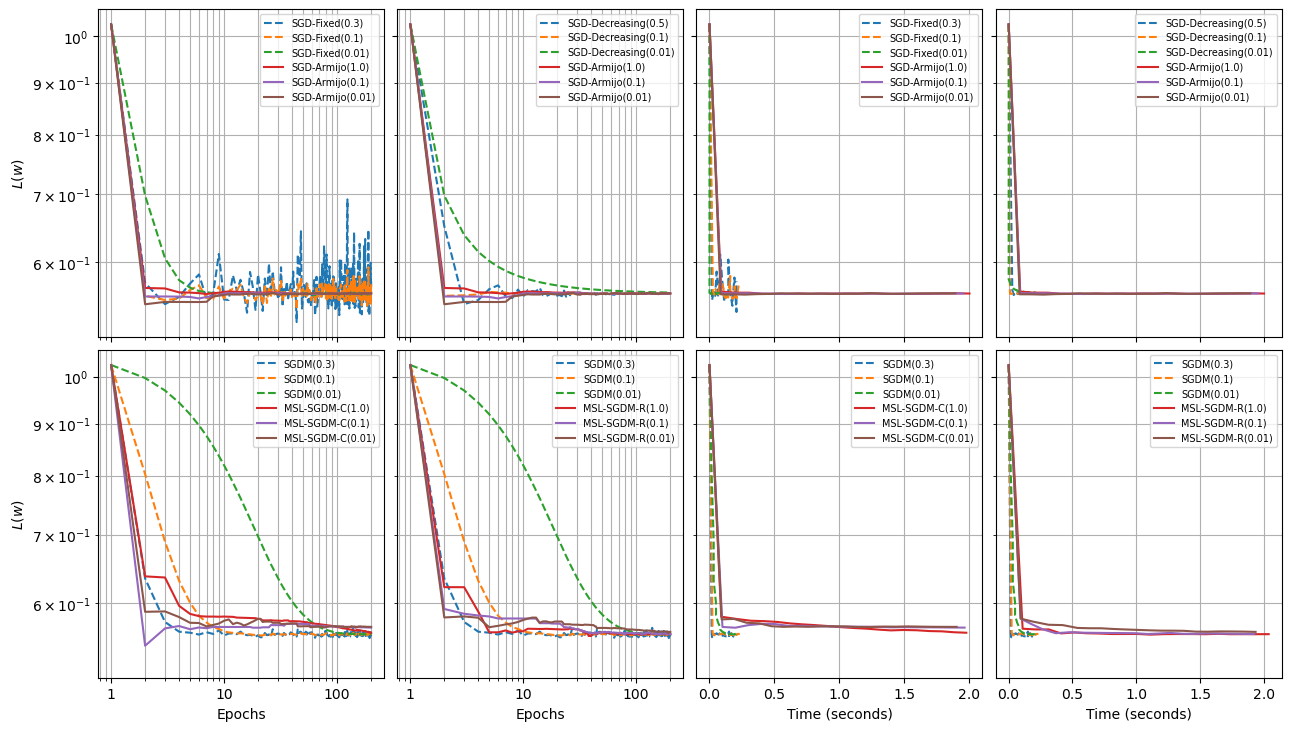

In [23]:
diagnostic(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-diagnostic.pdf")

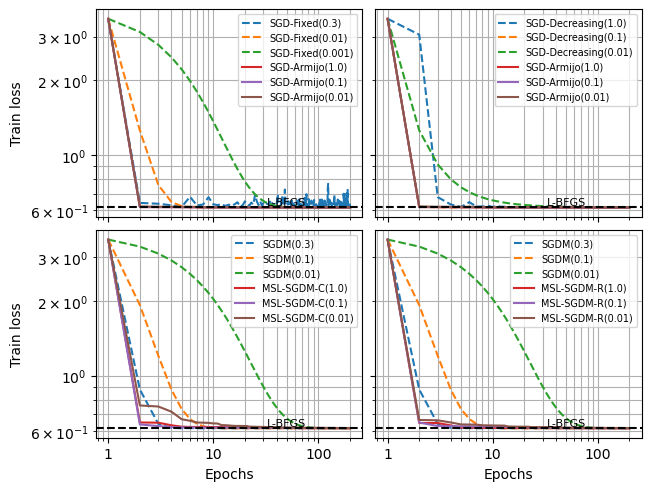

In [77]:
diagnostic_epochs(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-epochs.pdf")

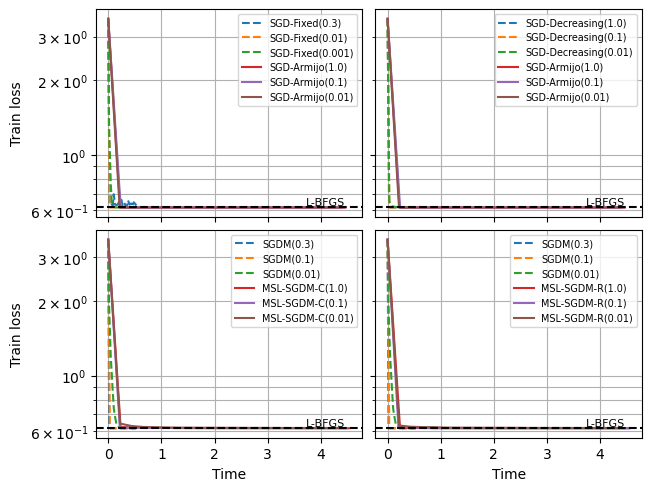

In [78]:
diagnostic_time(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-time.pdf")

## Fine-tuning

In [5]:
batchfixed_austr1 = LogisticRegression("SGD-Fixed", CAustr).fit(data_austr, kAustr, data_austr[1].size, 0.2, stop=1)

In [6]:
sgdfixed_austr1 = LogisticRegression("SGD-Fixed", CAustr).fit(data_austr, kAustr, MAustr, 0.001, stop=1)

In [7]:
sgddecre_austr1 = LogisticRegression("SGD-Decreasing", CAustr).fit(data_austr, kAustr, MAustr, 0.05, stop=1)

In [8]:
sgdm_austr1 = LogisticRegression("SGDM", CAustr).fit(data_austr, kAustr, MAustr, 0.02, 0.9, stop=1)

In [9]:
sgdarmijo_austr1 = LogisticRegression("SGD-Armijo", CAustr).fit(data_austr, kAustr, MAustr, 0.01, stop=1)

In [10]:
mslc_austr1 = LogisticRegression("MSL-SGDM-C", CAustr).fit(data_austr, kAustr, MAustr, 0.4, 0.9, stop=1)

In [11]:
mslr_austr1 = LogisticRegression("MSL-SGDM-R", CAustr).fit(data_austr, kAustr, MAustr, 0.5, 0.9, stop=1)

In [12]:
fine_austr_data = optim_data([batchfixed_austr1, sgdfixed_austr1, sgddecre_austr1, sgdm_austr1, sgdarmijo_austr1, mslc_austr1, mslr_austr1])

test_austr = models_summary(fine_austr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])
test_austr

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,0.000004,NaN,7,0.855072,0.876812,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,0.000005,NaN,8,0.855072,0.876812,0.335336
3,SGD-Fixed,1,552.0,0.200,0.0,0.615582,0.000802,0.040804,34,0.855072,0.876812,0.335312
5,SGD-Decreasing,1,8.0,0.050,0.0,0.615582,0.000905,0.020384,18,0.855072,0.876812,0.335422
6,SGDM,1,8.0,0.020,0.9,0.615582,0.000939,0.188975,190,0.855072,0.876812,0.335080
4,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000951,0.117412,108,0.855072,0.876812,0.335382
7,SGD-Armijo,1,8.0,0.010,0.0,0.615619,0.008680,1.967657,200,0.851449,0.876812,0.334840
9,MSL-SGDM-R,1,8.0,0.500,0.9,0.615639,0.010773,1.877768,200,0.853261,0.876812,0.334962
8,MSL-SGDM-C,1,8.0,0.400,0.9,0.616097,0.034237,1.906818,200,0.855072,0.884058,0.318909


In [13]:
print(test_austr[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.615582 & 0.000001 & 0.876812 \\
L-BFGS & NaN & 7 & NaN & 0.615582 & 0.000004 & 0.876812 \\
CG & NaN & 8 & NaN & 0.615582 & 0.000005 & 0.876812 \\
SGD-Fixed & 0.200000 & 34 & 0.040804 & 0.615582 & 0.000802 & 0.876812 \\
SGD-Decreasing & 0.050000 & 18 & 0.020384 & 0.615582 & 0.000905 & 0.876812 \\
SGDM & 0.020000 & 190 & 0.188975 & 0.615582 & 0.000939 & 0.876812 \\
SGD-Fixed & 0.001000 & 108 & 0.117412 & 0.615582 & 0.000951 & 0.876812 \\
SGD-Armijo & 0.010000 & 200 & 1.967657 & 0.615619 & 0.008680 & 0.876812 \\
MSL-SGDM-R & 0.500000 & 200 & 1.877768 & 0.615639 & 0.010773 & 0.876812 \\
MSL-SGDM-C & 0.400000 & 200 & 1.906818 & 0.616097 & 0.034237 & 0.884058 \\
\bottomrule
\end{tabular}



# Mushrooms

In [2]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}
sklearn train score: 1.000000
sklearn test score: 1.000000
sklearn sol norm: 11.742969941078488


In [3]:
Cmush = 1
Mmush = 32
kmush = 200

## Benchmark

In [4]:
benchMush = run_bench(data_mush, Cmush)

benchMush_data = optim_bench(benchMush)

## SGD

In [6]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", Cmush, data_mush, kmush, data_mush[1].size, (1, 0.1, 0.01))

In [7]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", Cmush, data_mush, kmush, Mmush, (0.3, 0.1, 0.01))

In [15]:
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", Cmush, data_mush, kmush, Mmush, (0.5, 0.1, 0.01))

In [9]:
# SGDM
sgdm_mush = run_solvers("SGDM", Cmush, data_mush, kmush, Mmush, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01))

In [11]:
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", Cmush, data_mush, kmush, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [12]:
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", Cmush, data_mush, kmush, Mmush, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [16]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [18]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,6499.0,0.10,0.0,0.580925,3.551600e-09,0.618092,200,0.892291,0.886154,0.399399
1,Newton-CG,1,NaN,NaN,NaN,0.580925,1.380831e-04,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,6.046219e-06,NaN,9,0.892291,0.886154,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,2.245995e-05,NaN,10,0.892291,0.886154,0.399399
11,SGD-Decreasing,1,32.0,0.01,0.0,0.580925,3.783285e-05,0.809243,200,0.892291,0.886154,0.399384
10,SGD-Decreasing,1,32.0,0.10,0.0,0.580925,5.147018e-04,0.799239,200,0.892291,0.886154,0.399386
14,SGDM,1,32.0,0.01,0.9,0.580925,7.543410e-04,0.817527,200,0.892291,0.886154,0.399338
9,SGD-Decreasing,1,32.0,0.50,0.0,0.580927,3.309706e-03,0.857931,200,0.892445,0.886769,0.400078
15,SGD-Armijo,1,32.0,1.00,0.0,0.580938,5.216406e-03,26.838845,200,0.892599,0.886154,0.399927
16,SGD-Armijo,1,32.0,0.10,0.0,0.580940,5.604534e-03,28.748529,200,0.892291,0.886769,0.399221


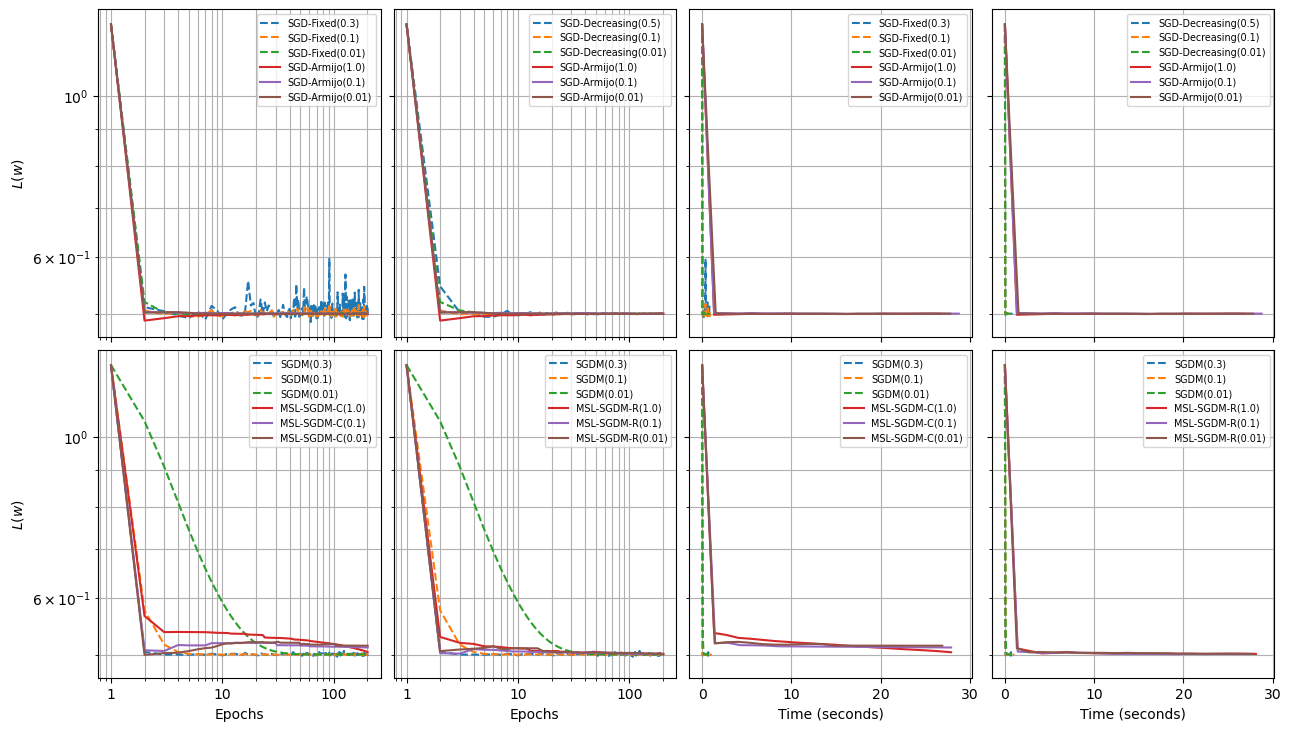

In [19]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

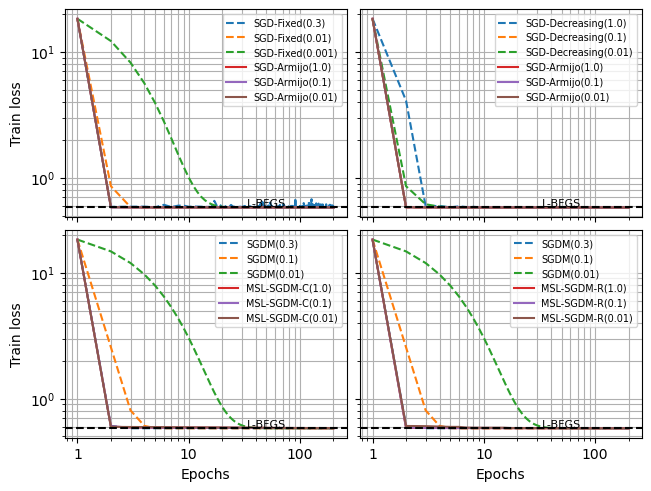

In [96]:
diagnostic_epochs(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-epochs.pdf")

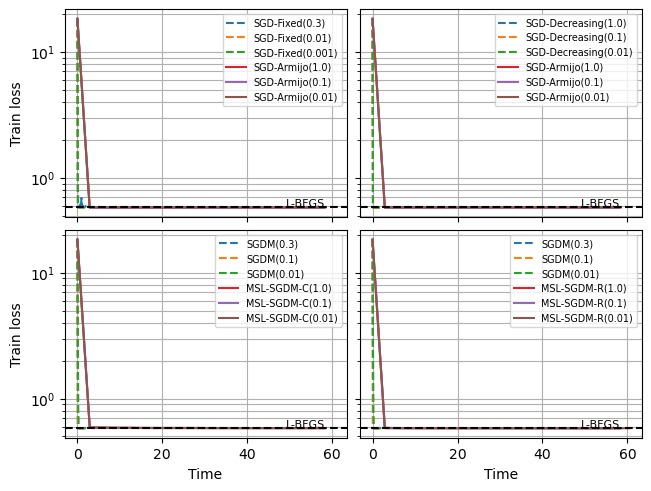

In [97]:
diagnostic_time(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-time.pdf")

## Fine-tuning

In [5]:
batchfixed_mush1 = LogisticRegression("SGD-Fixed", Cmush).fit(data_mush, kmush, data_mush[1].size, 0.05, stop=1)

In [6]:
sgdfixed_mush1 = LogisticRegression("SGD-Fixed", Cmush).fit(data_mush, kmush, Mmush, 0.001, stop=1)

In [7]:
sgddecre_mush1 = LogisticRegression("SGD-Decreasing", Cmush).fit(data_mush, kmush, Mmush, 0.1, stop=1)

In [23]:
sgdm_mush1 = LogisticRegression("SGDM", Cmush).fit(data_mush, kmush, Mmush, 0.1, 0.9, stop=1)

In [9]:
sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", Cmush).fit(data_mush, kmush, Mmush, 1, stop=1)

In [10]:
mslc_mush1 = LogisticRegression("MSL-SGDM-C", Cmush).fit(data_mush, kmush, Mmush, 0.2, 0.9, stop=1)

In [11]:
mslr_mush1 = LogisticRegression("MSL-SGDM-R", Cmush).fit(data_mush, kmush, Mmush, 0.5, 0.9, stop=1)

In [24]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.399399
4,SGD-Fixed,1,32.0,0.001,0.0,0.580925,0.000722,0.197826,45,0.892291,0.886154,0.399399
5,SGD-Decreasing,1,32.0,0.100,0.0,0.580925,0.000800,0.214876,54,0.892291,0.886154,0.399476
3,SGD-Fixed,1,6499.0,0.050,0.0,0.580925,0.000977,0.512237,168,0.892291,0.886154,0.399396
7,SGD-Armijo,1,32.0,1.000,0.0,0.580938,0.005216,27.260653,200,0.892599,0.886154,0.399927
6,SGDM,1,32.0,0.100,0.9,0.580971,0.016071,0.910722,200,0.892753,0.888000,0.401540
9,MSL-SGDM-R,1,32.0,0.500,0.9,0.581136,0.021103,27.067485,200,0.891060,0.884923,0.397588
8,MSL-SGDM-C,1,32.0,0.200,0.9,0.583713,0.079301,27.487761,200,0.894599,0.889231,0.366887


In [25]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 8 & NaN & 0.580925 & 0.000138 & 0.886154 \\
L-BFGS & NaN & 9 & NaN & 0.580925 & 0.000006 & 0.886154 \\
CG & NaN & 10 & NaN & 0.580925 & 0.000022 & 0.886154 \\
SGD-Fixed & 0.001000 & 45 & 0.197826 & 0.580925 & 0.000722 & 0.886154 \\
SGD-Decreasing & 0.100000 & 54 & 0.214876 & 0.580925 & 0.000800 & 0.886154 \\
SGD-Fixed & 0.050000 & 168 & 0.512237 & 0.580925 & 0.000977 & 0.886154 \\
SGD-Armijo & 1.000000 & 200 & 27.260653 & 0.580938 & 0.005216 & 0.886154 \\
SGDM & 0.100000 & 200 & 0.910722 & 0.580971 & 0.016071 & 0.888000 \\
MSL-SGDM-R & 0.500000 & 200 & 27.067485 & 0.581136 & 0.021103 & 0.884923 \\
MSL-SGDM-C & 0.200000 & 200 & 27.487761 & 0.583713 & 0.079301 & 0.889231 \\
\bottomrule
\end{tabular}



# German

In [2]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}
sklearn train score: 0.782500
sklearn test score: 0.780000
sklearn sol norm: 2.086752059198242


In [3]:
Cgerman = 1
Mgerman = 32
kgerman = 200

## Benchmark

In [4]:
benchgerman = run_bench(data_german, Cgerman)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [5]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", Cgerman, data_german, kgerman, data_german[1].size, (1, 0.1, 0.01))

In [6]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", Cgerman, data_german, kgerman, Mgerman, (0.3, 0.1, 0.01))

In [15]:
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", Cgerman, data_german, kgerman, Mgerman, (0.5, 0.1, 0.01))

In [8]:
# SGDM
sgdm_german = run_solvers("SGDM", Cgerman, data_german, kgerman, Mgerman, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [9]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", Cgerman, data_german, kgerman, Mgerman, (1, 0.1, 0.01))

In [10]:
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", Cgerman, data_german, kgerman, Mgerman, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [11]:
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", Cgerman, data_german, kgerman, Mgerman, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [16]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [17]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.700,0.248168
4,SGD-Fixed,1,800.0,0.10,0.0,0.619120,1.019632e-09,0.063989,200,0.70125,0.700,0.248168
0,L-BFGS,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.700,0.248163
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.700,0.248168
10,SGD-Decreasing,1,32.0,0.10,0.0,0.619120,4.915991e-05,0.137605,200,0.70125,0.700,0.248192
9,SGD-Decreasing,1,32.0,0.50,0.0,0.619120,3.178000e-04,0.155993,200,0.70125,0.700,0.248152
8,SGD-Fixed,1,32.0,0.01,0.0,0.619124,4.818886e-03,0.144761,200,0.70125,0.700,0.246666
16,SGD-Armijo,1,32.0,0.10,0.0,0.619128,4.083056e-03,1.500047,200,0.70125,0.700,0.248456
17,SGD-Armijo,1,32.0,0.01,0.0,0.619128,4.131150e-03,1.465800,200,0.70125,0.700,0.248562
15,SGD-Armijo,1,32.0,1.00,0.0,0.619132,5.674954e-03,1.552085,200,0.70125,0.700,0.249675


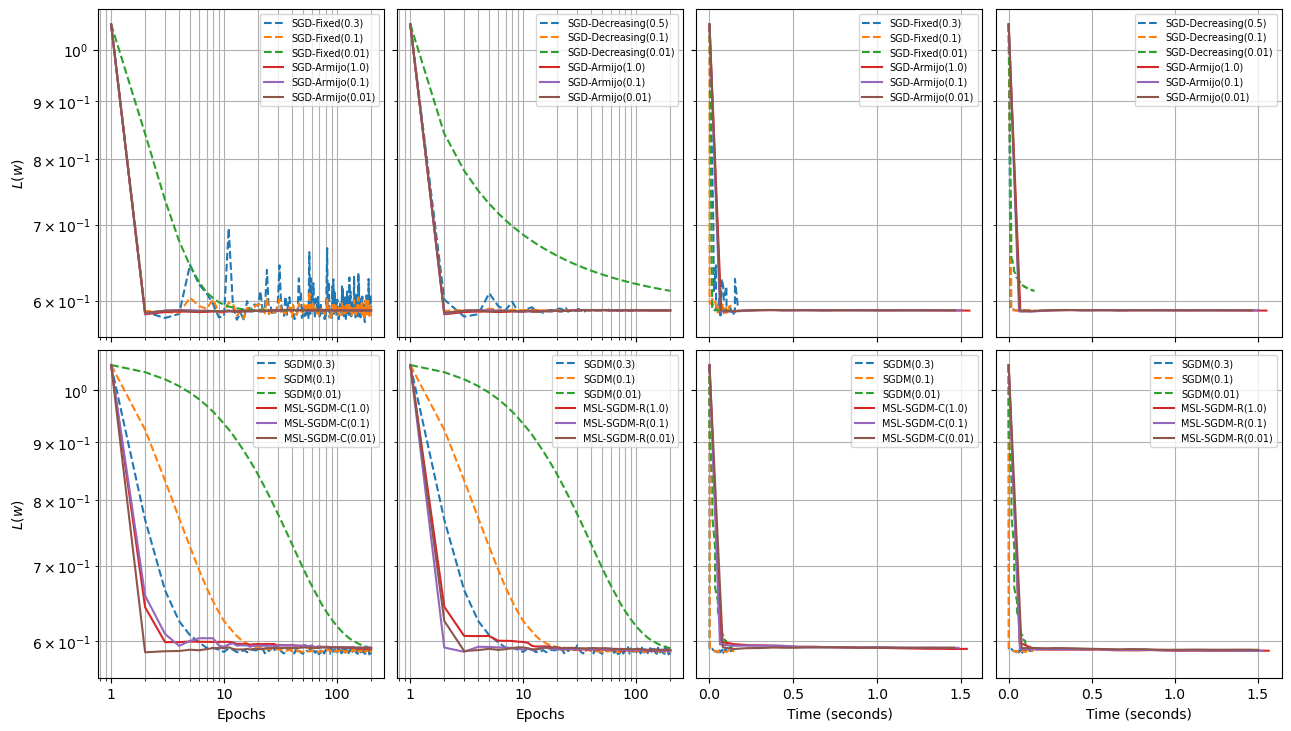

In [18]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

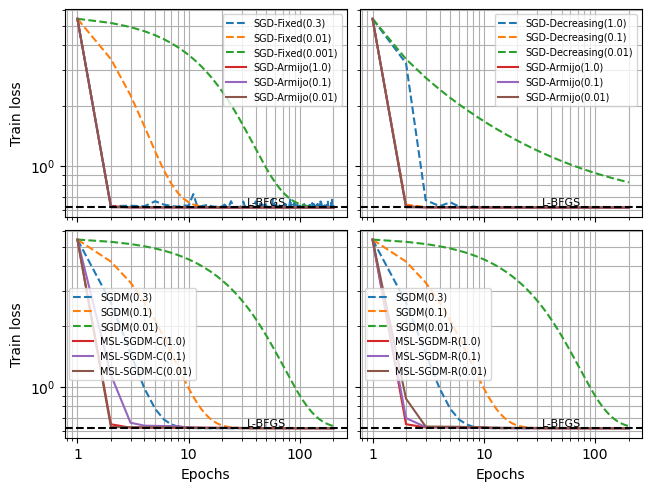

In [116]:
diagnostic_epochs(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-epochs.pdf")

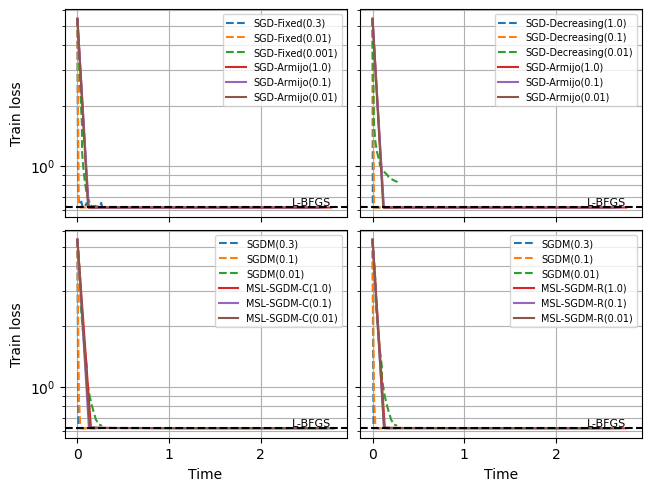

In [117]:
diagnostic_time(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-time.pdf")

## Fine-tuning

In [43]:
batchfixed_german1 = LogisticRegression("SGD-Fixed", Cgerman).fit(data_german, ktuning, data_german[1].size, 0.5, stop=1)

In [44]:
sgdfixed_german1 = LogisticRegression("SGD-Fixed", Cgerman).fit(data_german, ktuning, Mgerman, 0.005, stop=1)

In [45]:
sgddecre_german1 = LogisticRegression("SGD-Decreasing", Cgerman).fit(data_german, ktuning, Mgerman, 1, stop=1)

In [73]:
sgdm_german1 = LogisticRegression("SGDM", Cgerman).fit(data_german, ktuning, Mgerman, 0.02, 0.9, stop=1)

In [47]:
sgdarmijo_german1 = LogisticRegression("SGD-Armijo", Cgerman).fit(data_german, ktuning, Mgerman, 0.5, stop=1)

In [48]:
mslc_german1 = LogisticRegression("MSL-SGDM-C", Cgerman).fit(data_german, ktuning, Mgerman, 1, 0.9, stop=1)

In [49]:
mslr_german1 = LogisticRegression("MSL-SGDM-R", Cgerman).fit(data_german, ktuning, Mgerman, 1, 0.9, stop=1)

In [74]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.7,0.248168
0,L-BFGS,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.7,0.248163
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.7,0.248168
3,SGD-Fixed,1,800.0,0.500,0.0,0.619120,6.133016e-04,0.007074,12,0.70125,0.7,0.248084
5,SGD-Decreasing,1,32.0,1.000,0.0,0.619120,8.075209e-04,0.110289,161,0.70125,0.7,0.248094
4,SGD-Fixed,1,32.0,0.005,0.0,0.619121,9.625817e-04,0.047922,63,0.70125,0.7,0.248070
7,SGD-Armijo,1,32.0,0.500,0.0,0.619123,2.311816e-03,2.326434,300,0.70125,0.7,0.248266
6,SGDM,1,32.0,0.020,0.9,0.619123,2.693562e-03,0.205153,300,0.70125,0.7,0.248756
9,MSL-SGDM-R,1,32.0,1.000,0.9,0.619156,8.643267e-03,2.315079,300,0.70125,0.7,0.247199
8,MSL-SGDM-C,1,32.0,1.000,0.9,0.619223,1.483904e-02,2.374938,300,0.70125,0.7,0.245770


In [75]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.619120 & 0.000001 & 0.700000 \\
L-BFGS & NaN & 10 & NaN & 0.619120 & 0.000009 & 0.700000 \\
CG & NaN & 9 & NaN & 0.619120 & 0.000017 & 0.700000 \\
SGD-Fixed & 0.500000 & 12 & 0.007074 & 0.619120 & 0.000613 & 0.700000 \\
SGD-Decreasing & 1.000000 & 161 & 0.110289 & 0.619120 & 0.000808 & 0.700000 \\
SGD-Fixed & 0.005000 & 63 & 0.047922 & 0.619121 & 0.000963 & 0.700000 \\
SGD-Armijo & 0.500000 & 300 & 2.326434 & 0.619123 & 0.002312 & 0.700000 \\
SGDM & 0.020000 & 300 & 0.205153 & 0.619123 & 0.002694 & 0.700000 \\
MSL-SGDM-R & 1.000000 & 300 & 2.315079 & 0.619156 & 0.008643 & 0.700000 \\
MSL-SGDM-C & 1.000000 & 300 & 2.374938 & 0.619223 & 0.014839 & 0.700000 \\
\bottomrule
\end{tabular}

